# Using model VGG16 predict image

In [1]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import json

In [2]:
use_pretrained = True 
net = models.vgg16(pretrained=use_pretrained)
net.eval() # đánh giá mô hình
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
#Xử lý ảnh khi đưa vào
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    def __call__(self, img):
        return self.base_transform(img)

In [4]:
class predict():
    def __init__(self, class_index):
        self.clas_index = class_index

    def predict_max(self, output): # [0.9, 0.1]
        max_id = np.argmax(output.detach().numpy())
        predicted_label = self.clas_index[str(max_id)]
        return predicted_label

In [5]:
class_index = json.load(open('./data_test/imagenet_class_index.json', 'r'))

In [6]:
predict = predict(class_index)

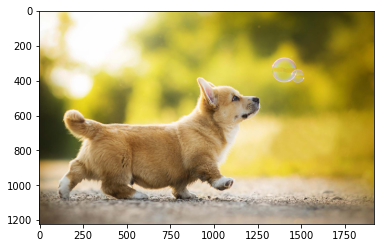

In [7]:
image_path2 = "./data_test/con_cho.jpg"
img = Image.open(image_path2)

plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


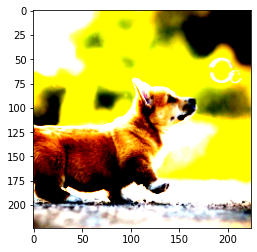

torch.Size([1, 3, 224, 224])


In [8]:
resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)  # Tạo transform

img_transform = transform(img) # transform cho ảnh


plt.imshow(img_transform.numpy().transpose(1,2,0))
plt.show()


img_transform = img_transform.unsqueeze_(0)

print(img_transform.shape)

In [9]:
out = net(img_transform)

result = predict.predict_max(out)

print(result)

['n02113023', 'Pembroke']
